In [ ]:
import pandas as pd
import re
import spacy

import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("videos.csv")
df.head(10)

,kind,videoId,publishedAt,channelId,title,description,tags,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,likeCount,favouriteCount,commentCount,topicCategories
0,youtube#video,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,en-US,en-US,PT9S,72.0,0.0,0.0,0.0,"['https://en.wikipedia.org/wiki/Health', 'http..."
1,youtube#video,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,NaN,NaN,PT45S,257.0,7.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
2,youtube#video,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,NaN,en-US,PT19S,164.0,4.0,0.0,2.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
3,youtube#video,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,NaN,NaN,PT14S,1207.0,20.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,youtube#video,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,NaN,en,PT56S,8647.0,268.0,0.0,7.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
5,youtube#video,32398,2021-10-06 01:28:59+00:00,39642,body lotion fit tuber 👈|| girls body lotion 👆|...,NaN,"['body lotion fit tuber', 'fit tuber body loti...",NaN,NaN,PT17S,1366.0,15.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
6,youtube#video,90721,2021-02-02 13:04:11+00:00,25860,"Contour Tutorial / How to do Contouring, Blush...",Makeup and Hair by @jagrutililawala\n\n#bride ...,NaN,NaN,NaN,PT1M34S,41.0,2.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
7,youtube#video,77725,2022-11-14 20:58:31+00:00,27788,Best look comes from the best products! #best ...,www.sopoli10x.com \n\n Beauty &Fashion. We re...,NaN,NaN,NaN,PT30S,1859.0,42.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
8,youtube#video,81779,2025-05-08 10:52:09+00:00,7310,Finishing touches. #blackgirlmakeup#makeup#bla...,NaN,NaN,NaN,NaN,PT30S,606.0,4.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
9,youtube#video,43693,2025-06-19 01:45:26+00:00,47519,glowup tips ✨️ #jenny #kpop #skincare #skincar...,#JennyGlowUp\n#KpopGlowUp\n#BeforeVsAfter\n#Gl...,NaN,en,en,PT11S,8951.0,172.0,0.0,5.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...


### Data Cleaning

In [ ]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # remove punctuation
    text = text.lower()
    return text

# Create clean_text directly from title, description, tags
df['clean_text'] = (
    df['title'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['tags'].fillna('')
).apply(clean_text)

# Preview
df['clean_text'].head(5)

,clean_text
0,unlocking the benefits of face masks for skin ...
1,get ready for the magic hydration glowingskin ...
2,trending makeup beautymakeup yslbeauty luxury ...
3,shortvedio balayage
4,full face of merit beauty featuring new flush...


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,kind,videoId,publishedAt,channelId,title,description,tags,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,likeCount,favouriteCount,commentCount,topicCategories,text,clean_text,products
0,youtube#video,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,en-US,en-US,PT9S,72.0,0.0,0.0,0.0,"['https://en.wikipedia.org/wiki/Health', 'http...",Unlocking the Benefits of Face Masks for Skin ...,unlocking benefits face masks skin health,[face mask]
1,youtube#video,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,NaN,NaN,PT45S,257.0,7.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,get ready hydration glowingskin nomakeuplook s...,[]
2,youtube#video,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,NaN,en-US,PT19S,164.0,4.0,0.0,2.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,#trending #makeup #beautymakeup #yslbeauty #lu...,trending makeup beautymakeup yslbeauty luxury ...,[]
3,youtube#video,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,NaN,NaN,PT14S,1207.0,20.0,0.0,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,#shortvedio #balayage,shortvedio balayage,[]
4,youtube#video,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,NaN,en,PT56S,8647.0,268.0,0.0,7.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Full Face of Merit Beauty 🤎 featuring new Flus...,full face merit beauty featuring new flush bal...,[]


In [ ]:
beauty_products = [
# Skincare & Face
"face cleanser","toner","moisturizer","serum","face mask","sheet mask","clay mask","peel-off mask",
"eye cream","sunscreen","night cream","exfoliator","face oil","BB cream","CC cream","foundation",
"primer","face mist","acne treatment","pore minimizer","face scrub","hydrating mask","brightening serum",
"anti-aging cream","retinol cream","vitamin C serum","hyaluronic acid serum","facial essence","eye serum",
"blemish cream","night serum","repair cream","facial lotion","face powder","setting spray","face primer",
"face toner pad","cleanser balm","micellar water","face cleansing oil","face wipes","thermal water spray",
"pore cleanser","facial foam","hydrating toner","calming cream","soothing gel","face essence sheet mask",
"skin cream",

# Lips
"lipstick","lip gloss","lip balm","lip liner","lip stain","lip scrub","lip tint","lip oil",
"matte lipstick","liquid lipstick","glossy lipstick","lip plumper","lip butter","lip exfoliator","lip conditioner",
"lip mask","lip crayon","lip lacquer","lip pencil","colored lip balm",

# Eyes
"mascara","eyeliner","eyeshadow","brow pencil","brow gel","brow pomade","eyelash serum","false eyelashes",
"eyelash glue","eye shadow primer","gel eyeliner","liquid eyeliner","cream eyeshadow","eyelid primer",
"eyebrow powder","eyebrow pen","eyebrow pencil","mascara primer","lash tint","lash curler","eyelash curler",
"lash adhesive","brow stencil","eye contour cream","eye shadow palette","waterproof mascara","kohl eyeliner",
"eye makeup remover","eye cream gel","eyebrow setting gel",

# Makeup Face
"contour","highlighter","blush","setting powder","setting spray","makeup remover","concealer","face palette",
"stick foundation","compact powder","liquid foundation","cushion foundation","cream blush","powder blush",
"bronzer","illuminator","tinted moisturizer","blemish concealer","makeup sponge","makeup brush set",
"compact concealer","foundation stick","loose powder","pressed powder","face illuminator","cream contour",
"powder contour","cream highlighter","powder highlighter","foundation primer","mineral foundation",

# Hair Care
"shampoo","conditioner","hair mask","hair serum","hair oil","hair spray","hair gel","hair cream",
"hair mousse","hair detangler","leave-in conditioner","dry shampoo","color protect shampoo","color protect conditioner",
"curl cream","heat protectant spray","hair styling cream","hair wax","hair pomade","hair clay","hair treatment",
"scalp treatment","hair tonic","hair growth serum","hair repair mask","split ends serum","volumizing mousse",
"smoothing cream","hair shine spray","hair curling cream","hair straightening cream","hair relaxer",
"hair texturizer","root lifting spray","hair leave-in spray","frizz control serum","anti-dandruff shampoo",
"anti-hair loss shampoo","hair strengthening mask","keratin treatment","hair vitamin spray","hair essence",
"hair booster serum","hair curl enhancer","hair detangling spray","hair thickening spray","hair smoothing mask",

# Body Care
"body lotion","body butter","body scrub","body wash","shower gel","hand cream","foot cream","body oil",
"deodorant","perfume","body mist","body serum","body exfoliator","hand sanitizer","foot scrub","body cream",
"body mask","after sun lotion","firming body cream","body shimmer","body moisturizer","hand mask","foot mask",
"body spray","shaving cream","shaving gel","body toner","body balm","massage oil","aromatherapy lotion",
"body milk","body polish","body moisturizer stick","body wash gel","body cleansing foam","scented lotion",
"self-tanning lotion","self-tanning mousse","sunblock","after bath oil","hydrating body cream","soothing body cream",
"whitening cream","brightening body lotion","body mist spray","body lotion with SPF","anti-cellulite cream",

# Nails
"nail polish","nail polish remover","nail file","nail buffer","cuticle oil","nail strengthener","gel nail kit",
"acrylic nails","nail top coat","nail base coat","nail art pen","nail stickers","nail brush","nail glue","nail cuticle cream",
"nail cuticle remover","nail growth serum","matte top coat","glossy top coat","nail gel polish","nail curing lamp",
"nail stamping kit","nail decals","nail rhinestones","nail powder","nail dipping powder","nail foils","nail liquid powder",
"nail glitter","nail tips","nail forms","nail cuticle oil pen","nail clipper","nail scissors","toe separators",

# Tools & Accessories
"makeup brush","beauty blender","eyelash curler","tweezers","makeup sponge","facial roller","jade roller",
"gua sha","hair brush","comb","eyebrow brush","brush cleaner","foundation brush","powder brush","blending brush",
"concealer brush","eyeshadow brush","lip brush","fan brush","angled brush","kabuki brush","brow comb","lash comb",
"hair dryer","straightening iron","curling iron","hot brush","hair clip","hair tie","headband","makeup mirror",
"cosmetic bag","makeup organizer","spoolie brush","lash applicator","beauty spatula","facial cleansing brush",
"silicone brush","exfoliating glove","tweezing tool","eyelash separator","makeup palette","brush set","cosmetic jar",

# Fragrance & Wellness
"body perfume","essential oil","bath bomb","face roller","aromatherapy oil","lip scrub","body scrub",
"facial cleansing brush","sheet mask set","face serum set","body mist set","scented candle","bath salt","hair mist",
"aroma diffuser","relaxing oil","massage oil","body mist spray","herbal cream","foot soak","hand soak",
"spa mask","spa cream","wellness serum","medicated cream","detox oil","hydrating gel","facial essence set",
"rejuvenating cream","detox mask","relaxing balm","calming lotion","herbal lotion","vitamin C cream","vitamin E oil",

# Men & Unisex
"beard oil","aftershave","hair styling cream","body wash for men","men's moisturizer","men's face wash",
"men's hair gel","men's hair spray","men's deodorant","men's cologne","men's shaving cream","men's beard balm",
"men's beard conditioner","men's body scrub","men's sunscreen","men's facial scrub","men's facial cream",
"men's toner","men's exfoliator","men's hair tonic","men's hair mask"
]


In [ ]:
def extract_products_keyword(text, product_list):
    return [p for p in product_list if p in text]

# Apply to CSV
df['products'] = df['clean_text'].apply(lambda x: extract_products_keyword(x, beauty_products))

In [ ]:
df.to_csv("youtube_beauty_products.csv", index=False)

Most mentioned products

/tmp/ipython-input-932095095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product', y='count', data=top_10, palette='viridis')


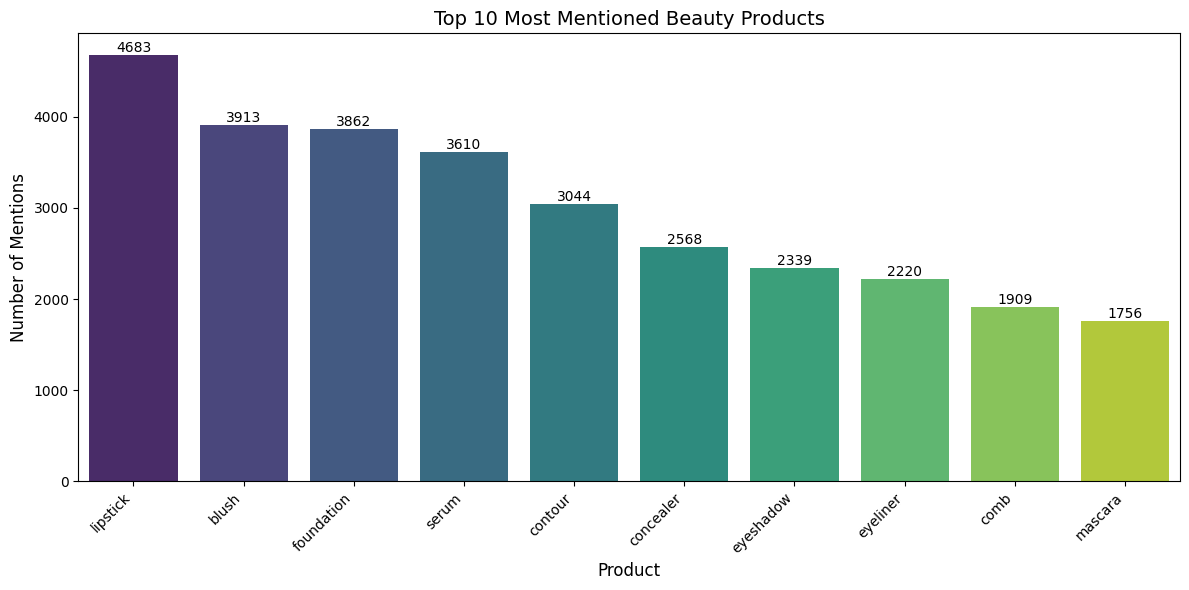

In [ ]:
all_products = [prod for sublist in df['products'].dropna() for prod in set(sublist)]  # remove duplicates per video
product_counts = Counter(all_products)

# Convert to DataFrame
product_counts_df = pd.DataFrame(product_counts.items(), columns=['product', 'count'])
product_counts_df = product_counts_df.sort_values(by='count', ascending=False)

# Top 10
top_10 = product_counts_df.head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x='product', y='count', data=top_10, palette='viridis')

# Add counts on top of bars
for p in ax.patches:  # iterate over bars
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Most Mentioned Beauty Products", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_10_json_path = "top_10_products.json"
top_10.to_json(top_10_json_path, orient="records", indent=2)

In [ ]:
import pandas as pd
import re

# Load CSV files
df_beauty = pd.read_csv("youtube_beauty_products.csv")  # beauty file
df_trend = pd.read_csv("trend_both_youtube.csv")        # trend file

# Normalize beauty products to flat lists
def normalize_products(products):
    if pd.isna(products):
        return []
    if isinstance(products, str):
        products = products.strip("[]")
        return [p.strip().strip("'\"") for p in products.split(",") if p.strip()]
    if isinstance(products, list):
        return products
    return []

df_beauty['products'] = df_beauty['products'].apply(normalize_products)

# Extract hashtags from text
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

# Initialize a products column in trend file
df_trend['products'] = [[] for _ in range(len(df_trend))]

# Loop through each trend_id in trend file
for idx_trend, trend_row in df_trend.iterrows():
    trend_id = trend_row['trend_id'].lstrip("#")  # remove ## to match text hashtags

    # Loop through each beauty text row
    for _, beauty_row in df_beauty.iterrows():
        text_hashtags = extract_hashtags(beauty_row['text'])  # or 'clean_text' if you prefer
        if trend_id in text_hashtags:
            # Append products from beauty file, avoid duplicates
            existing_products = df_trend.at[idx_trend, 'products']
            for p in beauty_row['products']:
                if p not in existing_products:
                    existing_products.append(p)
            df_trend.at[idx_trend, 'products'] = existing_products

# Convert list of products to comma-separated string
df_trend['products'] = df_trend['products'].apply(lambda x: ', '.join(x))

# Save updated trend file
df_trend.to_csv("trend_both_youtube_updated.csv", index=False)
print("Updated trend file saved as trend_both_youtube_updated.csv")

df_trend["products"].head()

Updated trend file saved as trend_both_youtube_updated.csv


,products
0,"moisturizer, body lotion, face powder, lipstic..."
1,"bronzer, contour, lipstick, eyeliner, eyeshado..."
2,"gua sha, comb, contour, lipstick, serum, acne ..."
3,"gua sha, contour, blush, bronzer, highlighter,..."
4,"foundation, lipstick, mascara, eyeshadow, blus..."


Loreal Products

In [1]:
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import json
from fuzzywuzzy import fuzz

# === Load files ===
csv_path = "trend_both_youtube_updated.csv"
brands_path = "loreal_brands.json"
products_path = "loreal_products.json"

df = pd.read_csv(csv_path)

with open(brands_path, "r", encoding="utf-8") as f:
    brands_data = json.load(f)

with open(products_path, "r", encoding="utf-8") as f:
    products_data = json.load(f)

# === Flatten brand data ===
brand_list = []
for category, items in brands_data.items():
    for b in items:
        brand_list.append({
            "brand": b["brand"],
            "description": b["description"],
            "category": category
        })

# === Flatten product data ===
product_list = [{"title": p["title"], "description": p["description"]} for p in products_data]

# === Matching functions ===
def get_best_product(products_str):
    """Return the single best-matching L'Oréal product"""
    if pd.isna(products_str):
        return None

    products = [p.strip().lower() for p in products_str.split(",")]
    best_score = 0
    best_product = None

    for prod in products:
        for item in product_list:
            score_title = fuzz.partial_ratio(prod, item["title"].lower())
            score_desc = fuzz.partial_ratio(prod, item["description"].lower())
            score = max(score_title, score_desc)
            if score > best_score:
                best_score = score
                best_product = item["title"]
    return best_product

def get_best_brands(trend_id, products_str, top_n=3):
    """Return 1–3 best-matching brands"""
    text = (str(trend_id) + " " + str(products_str)).lower()
    scored = []
    for b in brand_list:
        score_brand = fuzz.partial_ratio(b["brand"].lower(), text)
        score_desc = fuzz.partial_ratio(b["description"].lower(), text)
        score = max(score_brand, score_desc)
        if score > 50:  # relevance threshold
            scored.append((b["brand"], score))
    scored = sorted(scored, key=lambda x: x[1], reverse=True)
    best_brands = [s[0] for s in scored[:top_n]]
    return best_brands if best_brands else None

# === Apply to dataset ===
df["best_loreal_product"] = df["products"].apply(get_best_product)
df["best_brands"] = df.apply(lambda x: get_best_brands(x["trend_id"], x["products"]), axis=1)

# === Save result ===
output_path = "trend_with_loreal_mapping.csv"
df.to_csv(output_path, index=False)

print(f"✅ New CSV saved to {output_path}")

✅ New CSV saved to trend_with_loreal_mapping.csv


In [4]:
df.head(5)

,trend_id,token_type,platform,date,volume,engagement,audience_signals,category,geo,raw_token,growth_rate_7d,acceleration,current_stage,recommended_action,products,best_loreal_product,best_brands
0,##shorts,hashtag,youtube,2025-09-07,9739,37255097,"{'gen_z': np.float64(0.75), 'millennials': np....","['lifestyle', 'health', 'general']","['hi', 'en', 'ru', 'ur', 'en-GB', 'en-IN', 'en...",##shorts,-0.111,0.667,peak,Maintain visibility,"moisturizer, body lotion, face powder, lipstic...",Glycolic Bright\nGlycolic Bright 8% [Melasyl ™...,"[Garnier, Maybelline New York, NYX Professiona..."
1,##makeup,hashtag,youtube,2025-09-07,4091,70248158,"{'gen_z': np.float64(0.46), 'millennials': np....","['lifestyle', 'general', 'health']","['en', 'en-GB', 'hi', 'en-IN', 'ml', 'es', 'id...",##makeup,0.000,-0.333,declining,Too late,"bronzer, contour, lipstick, eyeliner, eyeshado...",Infallible Lip Makeup\nInfallible Matte Resist...,"[Garnier, Maybelline New York]"
2,##yoga,hashtag,youtube,2025-09-07,3075,1352141,"{'gen_z': np.float64(0.49), 'millennials': np....","['health', 'lifestyle', 'general']","['hi', 'en', 'en-IN', 'zxx']",##yoga,1.000,0.333,emerging,Hop on now,"gua sha, comb, contour, lipstick, serum, acne ...",Glycolic Bright\nAnti-Dark Spot Exfoliant Peel,"[Essie, Armani Beauty, Maison Margiela]"
3,##facelift,hashtag,youtube,2025-09-07,2407,616522,"{'gen_z': np.float64(0.66), 'millennials': np....","['health', 'lifestyle']","['en-US', 'es', 'en', 'zxx', 'hi']",##facelift,0.000,0.667,peak,Maintain visibility,"gua sha, contour, blush, bronzer, highlighter,...",Infallible\nFull Wear More Than Concealer,"[CeraVe, Garnier]"
4,##beauty,hashtag,youtube,2025-09-07,2038,44001722,"{'gen_z': np.float64(0.44), 'millennials': np....","['lifestyle', 'general', 'health']","['en-US', 'en', 'hi', 'en-IN', 'en-GB', 'id', ...",##beauty,0.000,0.000,declining,Too late,"foundation, lipstick, mascara, eyeshadow, blus...",Infallible\n32H FreshWear Foundation,"[Carita, Valentino, Urban Decay]"
